In [1]:
# Imports
import os
import xarray as xr
import matplotlib.pyplot as plt
from oggm.utils import get_demo_file, gettempdir

# specify path to working directories
wdir_vas = '/Users/oberrauch/work/master/working_directories/commitment_run_vas/'
wdir_oggm = '/Users/oberrauch/work/master/working_directories/commitment_run_oggm/'

# Read the files using xarray
ds_vas = xr.open_dataset(os.path.join(wdir_vas, 'run_output_vas.nc'))
ds_oggm = xr.open_dataset(os.path.join(wdir_oggm, 'run_output_commitment.nc'))

## Plot basin sum of glacier volume

In [31]:
vol_oggm_km3 = (ds_oggm.volume.sum(dim='rgi_id')/1e9)
vol_vas_km3 = (ds_vas.volume.sum(dim='rgi_id')/1e9)

In [114]:
file_path = 'test.124.png'
file_path.split('.')[-1]

'png'

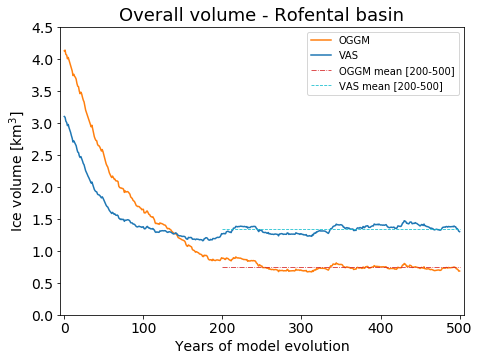

In [78]:
# create figure and axes
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot both model outputs
vol_oggm_km3.plot(ax=ax ,label='OGGM', c='C1')
vol_vas_km3.plot(ax=ax, label='VAS', c='C0')

# add average over last k years
ys = 200
oggm_const = vol_oggm_km3.sel(time=slice(ys, 500))
ax.plot([ys, 500], [oggm_const.mean(), oggm_const.mean()],
        ls='-.', c='C3', lw=0.8, label='OGGM mean [200-500]')
vas_const = vol_vas_km3.sel(time=slice(ys, 500))
ax.plot([ys, 500], [vas_const.mean(), vas_const.mean()],
        ls='--', c='C9', lw=0.8, label='VAS mean [200-500]')

# adjust y-axis
ax.set_xlim([-5, 505])
ax.set_ylim([0, 4.5])

# title, label, legend, ...
ax.set_title('Overall volume - Rofental basin', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Years of model evolution', fontsize=14)
ax.set_ylabel('Ice volume [km$^3$]', fontsize=14)
ax.legend(fontsize=10)

# save to file
plt.savefig('../plots/rofental.pdf', bbox_inches='tight', format='pdf')

## Look at a single glacier

In [71]:
# Pick a specific glacier (Hintereisferner)
rid = 'RGI60-11.00897'
hef_vas = ds_vas.sel(rgi_id=rid)
hef_oggm = ds_oggm.sel(rgi_id=rid)

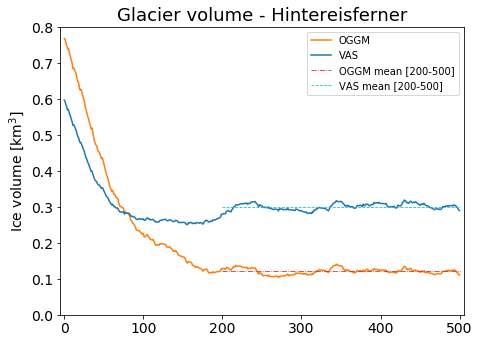

In [82]:
# select volume and scale to km3
oggm = (hef_oggm.volume/1e9)
vas = (hef_vas.volume/1e9)

# create figure and axes
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot both model outputs
oggm.plot(ax=ax ,label='OGGM', c='C1')
vas.plot(ax=ax, label='VAS', c='C0')

# add average over last k years
ys = 200
oggm_const = oggm.sel(time=slice(ys, 500))
ax.plot([ys, 500], [oggm_const.mean(), oggm_const.mean()],
        ls='-.', c='C3', lw=0.8, label='OGGM mean [200-500]')
vas_const = vas.sel(time=slice(ys, 500))
ax.plot([ys, 500], [vas_const.mean(), vas_const.mean()],
        ls='--', c='C9', lw=0.8, label='VAS mean [200-500]')

# adjust y-axis
ax.set_xlim([-5, 505])
ax.set_ylim([0, 0.8])

# title, label, legend, ...
ax.set_title('Glacier volume - Hintereisferner', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
#ax.set_xlabel('Years of model evolution', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Ice volume [km$^3$]', fontsize=14)
ax.legend(fontsize=10)

# save to file
plt.savefig('../plots/hef_volume.pdf', bbox_inches='tight', format='pdf')

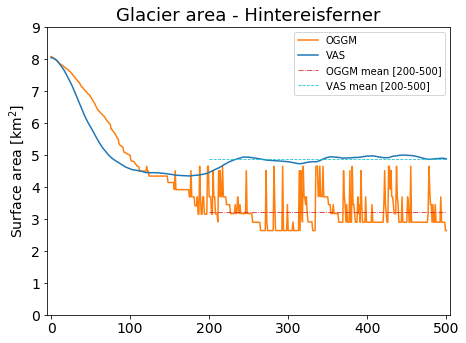

In [84]:
# select area and scale to km2
oggm = (hef_oggm.area/1e6)
vas = (hef_vas.area/1e6)

# create figure and axes
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot both model outputs
oggm.plot(ax=ax ,label='OGGM', c='C1')
vas.plot(ax=ax, label='VAS', c='C0')

# add average over last k years
ys = 200
oggm_const = oggm.sel(time=slice(ys, 500))
ax.plot([ys, 500], [oggm_const.mean(), oggm_const.mean()],
        ls='-.', c='C3', lw=0.8, label='OGGM mean [200-500]')
vas_const = vas.sel(time=slice(ys, 500))
ax.plot([ys, 500], [vas_const.mean(), vas_const.mean()],
        ls='--', c='C9', lw=0.8, label='VAS mean [200-500]')

# adjust y-axis
ax.set_xlim([-5, 505])
ax.set_ylim([0, 9])

# title, label, legend, ...
ax.set_title('Glacier area - Hintereisferner', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
#ax.set_xlabel('Years of model evolution', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Surface area [km$^2$]', fontsize=14)
ax.legend(fontsize=10)

# save to file
plt.savefig('../plots/hef_area.pdf', bbox_inches='tight', format='pdf')

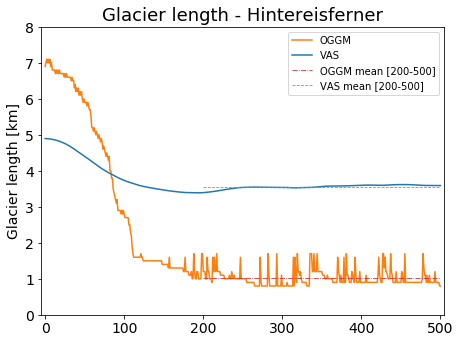

In [86]:
# select length and scale to km2
oggm = (hef_oggm.length/1e3)
vas = (hef_vas.length/1e3)

# create figure and axes
fig = plt.figure(figsize=[7,5])
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot both model outputs
oggm.plot(ax=ax ,label='OGGM', c='C1')
vas.plot(ax=ax, label='VAS', c='C0')

# add average over last k years
ys = 200
oggm_const = oggm.sel(time=slice(ys, 500))
ax.plot([ys, 500], [oggm_const.mean(), oggm_const.mean()],
        ls='-.', c='C3', lw=0.8, label='OGGM mean [200-500]')
vas_const = vas.sel(time=slice(ys, 500))
ax.plot([ys, 500], [vas_const.mean(), vas_const.mean()],
        ls='--', c='C9', lw=0.8, label='VAS mean [200-500]')

# adjust y-axis
ax.set_xlim([-5, 505])
ax.set_ylim([0, 8])

# title, label, legend, ...
ax.set_title('Glacier length - Hintereisferner', fontsize=18)
ax.tick_params(axis='both', labelsize=14)
#ax.set_xlabel('Years of model evolution', fontsize=14)
ax.set_xlabel('')
ax.set_ylabel('Glacier length [km]', fontsize=14)
ax.legend(fontsize=10)

# save to file
plt.savefig('../plots/hef_length.pdf', bbox_inches='tight', format='pdf')

In [1]:
"""
    INITIALIZE Hintereisferner:
    Run all necessary preprocessing tasks up to the mu* calibration
    (i.e. `local_mu_star`). Save as... in order to use as template for further
    experiments.

    Date: 07.02.2019
"""
# import externals libs
import os
import shutil
import numpy as np
import pandas as pd
import geopandas as gpd

# import the needed OGGM modules
import oggm
from oggm import cfg
from oggm.utils import get_demo_file, get_rgi_glacier_entities
from oggm.tests.funcs import get_test_dir
from oggm.core import gis, climate, centerlines, vascaling

# ---------------------
#  PREPROCESSING TASKS
# ---------------------

# create test directory
testdir = os.path.join(get_test_dir(), 'tmp_comparison')
if not os.path.exists(testdir):
    os.makedirs(testdir)
shutil.rmtree(testdir)
os.makedirs(testdir)

# load default parameter file
cfg.initialize()
cfg.PATHS['working_dir'] = testdir

cfg.PATHS['dem_file'] = get_demo_file('hef_srtm.tif')
cfg.PARAMS['border'] = 10

cfg.PARAMS['baseline_climate'] = 'HISTALP'
cfg.PARAMS['prcp_scaling_factor'] = 1.75
cfg.PARAMS['temp_melt'] = -1.75

cfg.PARAMS['use_multiprocessing'] = True

cfg.set_intersects_db(get_demo_file('rgi_intersect_oetztal.shp'))

# read the Hintereisferner DEM
hef_file = get_demo_file('Hintereisferner_RGI5.shp')
entity = gpd.read_file(hef_file).iloc[0]

# initialize the GlacierDirectory
gdir = oggm.GlacierDirectory(entity, base_dir=testdir)
# define the local grid and glacier mask
gis.define_glacier_region(gdir, entity=entity)
gis.glacier_masks(gdir)

2019-02-25 11:26:46: oggm.cfg: Using configuration file: /Users/oberrauch/oggm-fork/oggm/params.cfg
2019-02-25 11:26:46: oggm.core.gis: (RGI50-11.00897) define_glacier_region
2019-02-25 11:26:46: oggm.core.gis: (RGI50-11.00897) glacier_masks


In [2]:
# process the given climate file
climate.process_histalp_data(gdir)

2019-02-25 11:26:46: oggm.core.climate: (RGI50-11.00897) process_histalp_data


In [3]:
# run center line preprocessing tasks
centerlines.compute_centerlines(gdir)
centerlines.initialize_flowlines(gdir)
centerlines.compute_downstream_line(gdir)
centerlines.compute_downstream_bedshape(gdir)
centerlines.catchment_area(gdir)
centerlines.catchment_intersections(gdir)
centerlines.catchment_width_geom(gdir)
centerlines.catchment_width_correction(gdir)

2019-02-25 11:26:49: oggm.core.centerlines: (RGI50-11.00897) compute_centerlines
2019-02-25 11:26:50: oggm.core.centerlines: (RGI50-11.00897) initialize_flowlines
2019-02-25 11:26:50: oggm.core.centerlines: (RGI50-11.00897) compute_downstream_line
2019-02-25 11:26:50: oggm.core.centerlines: (RGI50-11.00897) compute_downstream_bedshape
2019-02-25 11:26:50: oggm.core.centerlines: (RGI50-11.00897) catchment_area
2019-02-25 11:26:52: oggm.core.centerlines: (RGI50-11.00897) catchment_intersections
2019-02-25 11:26:52: oggm.core.centerlines: (RGI50-11.00897) catchment_width_geom
2019-02-25 11:26:53: oggm.core.centerlines: (RGI50-11.00897) catchment_width_correction


In [6]:
# calibrate mass balance parameters
vascaling.local_t_star(gdir)
vas_mustar = gdir.read_json('vascaling_mustar')
vas_mustar

{'rgi_id': 'RGI50-11.00897',
 't_star': 1905,
 'bias': 66.12871878745477,
 'mu_star': 48.981949777713275}

In [12]:
# create mass balance model
mb_mod = vascaling.VAScalingMassBalance(gdir)
# check if mass balance model uses the correct parameters
assert mb_mod.mu_star == vas_mustar['mu_star']

In [20]:
# let model start somewhere within the HistAlp climate period [1802,2014]
year_0 = 1900
# get needed info to initialize vas model
area_m2_0 = gdir.rgi_area_m2
min_hgt, max_hgt = vascaling.get_min_max_elevation(gdir)

In [21]:
# instance vas model
vas_mod = vascaling.VAScalingModel(year_0, area_m2_0, min_hgt, max_hgt, mb_mod)
print(vas_mod)

<class 'oggm.core.vascaling.VAScalingModel'>
year: 1900
area [km2]: 8.04
volume [km3]: 0.596
length [km]: 4.89
min elev [m asl.]: 2446
spec mb [mm w.e. yr-1]: -890.71


In [83]:
# load possible changes
import importlib
importlib.reload(vascaling)
# instance model and run for 50 years
vas_mod = vascaling.VAScalingModel(1850, area_m2_0, min_hgt, max_hgt, mb_mod)
diag_path = gdir.get_filepath('model_diagnostics', filesuffix='_vas')
diag_ds = vas_mod.run_until_and_store(1950, diag_path=diag_path)
diag_ds

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


<xarray.Dataset>
Dimensions:         (time: 101)
Coordinates:
  * time            (time) float64 1.85e+03 1.851e+03 1.852e+03 1.853e+03 ...
    hydro_year      (time) int64 1850 1851 1852 1853 1854 1855 1856 1857 ...
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    calendar_year   (time) int64 1849 1850 1851 1852 1853 1854 1855 1856 ...
    calendar_month  (time) int64 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...
Data variables:
    volume_m3       (time) float64 5.963e+08 5.947e+08 6.006e+08 5.979e+08 ...
    area_m2         (time) float64 8.036e+06 8.035e+06 8.038e+06 8.038e+06 ...
    length_m        (time) float64 4.895e+03 4.895e+03 4.895e+03 4.895e+03 ...
    ela_m           (time) float64 nan nan nan nan nan nan nan nan nan nan ...
    spec_mb         (time) float64 -179.5 -179.5 664.0 -309.8 -386.4 -631.7 ...
    min_hgt         (time) float64 2.446e+03 2.446e+03 2.446e+03 2.446e+03 ...
Attributes:
    description:    VAS model output
    og

In [85]:
from oggm import utils
utils.compile_run_output([gdir], filesuffix='_vas')

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


<xarray.Dataset>
Dimensions:         (rgi_id: 1, time: 101)
Coordinates:
  * time            (time) float64 1.85e+03 1.851e+03 1.852e+03 1.853e+03 ...
  * rgi_id          (rgi_id) <U14 'RGI50-11.00897'
    hydro_year      (time) int64 1850 1851 1852 1853 1854 1855 1856 1857 ...
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    calendar_year   (time) int64 1849 1850 1851 1852 1853 1854 1855 1856 ...
    calendar_month  (time) int64 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...
Data variables:
    volume          (time, rgi_id) float64 5.963e+08 5.947e+08 6.006e+08 ...
    area            (time, rgi_id) float64 8.036e+06 8.035e+06 8.038e+06 ...
    length          (time, rgi_id) float64 4.895e+03 4.895e+03 4.895e+03 ...
    ela             (time, rgi_id) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    description:    OGGM model output
    oggm_version:   1.0.3+149.g1dd6f37.dirty
    calendar:       365-day no leap
    creation_date:  2019-02

In [72]:
gdirs = [gdir, gdir]
# Get the dimensions of all this
rgi_ids = [gd.rgi_id for gd in gdirs]

In [73]:
ds_diag = xr.open_dataset(gdir.get_filepath('model_diagnostics', filesuffix='_vas'))
time = ds_diag.time.values
time

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950.])

In [74]:
shape = (len(time), len(rgi_ids))

vol = np.zeros(shape)
area = np.zeros(shape)
length = np.zeros(shape)

In [78]:
ppath = gdir.get_filepath('model_diagnostics',
                          filesuffix='_vas')
with xr.open_dataset(ppath) as ds_diag:
            vol[:, i] = ds_diag.volume_m3.values
            area[:, i] = ds_diag.area_m2.values
            length[:, i] = ds_diag.length_m.values

In [81]:
for i, gdir in enumerate(gdirs):
    try:
        ppath = gdir.get_filepath('model_diagnostics',
                                  filesuffix='_vas')
        with xr.open_dataset(ppath) as ds_diag:
            vol[:, i] = ds_diag.volume_m3.values
            area[:, i] = ds_diag.area_m2.values
            length[:, i] = ds_diag.length_m.values
    except BaseException:
        vol[:, i] = np.NaN
        area[:, i] = np.NaN
        length[:, i] = np.NaN

In [50]:
import xarray as xr
xr.open_dataarray(gdir.get_filepath('model_diagnostics'))

FileNotFoundError: [Errno 2] No such file or directory: b'/Users/oberrauch/OGGM/tests/6812c0f0a1d967e0725912a5602d4282e51cc617/tmp_comparison/RGI50-11/RGI50-11.00/RGI50-11.00897/model_diagnostics.nc'

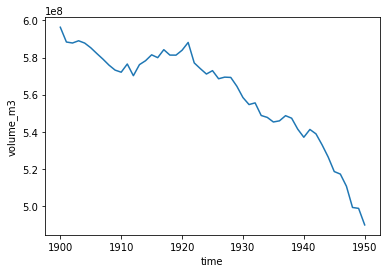

In [39]:
diag_ds['volume_m3'].plot()

In [ ]:

        # Run
        j = 0
        for i, (yr, mo) in enumerate(zip(monthly_time, months)):
            self.run_until(yr)
            # Model run
            if mo == 1:
                for s, w, fl in zip(sects, widths, self.fls):
                    s[j, :] = fl.section
                    w[j, :] = fl.widths_m
                j += 1
            # Diagnostics
            diag_ds['volume_m3'].data[i] = self.volume_m3
            diag_ds['area_m2'].data[i] = self.area_m2
            diag_ds['length_m'].data[i] = self.length_m
            diag_ds['ela_m'].data[i] = self.mb_model.get_ela(year=yr)
            if self.is_tidewater:
                diag_ds['calving_m3'].data[i] = self.calving_m3_since_y0

        # to datasets
        run_ds = []
        for (s, w) in zip(sects, widths):
            ds = xr.Dataset()
            ds.attrs['description'] = 'OGGM model output'
            ds.attrs['oggm_version'] = __version__
            ds.attrs['calendar'] = '365-day no leap'
            ds.attrs['creation_date'] = strftime("%Y-%m-%d %H:%M:%S",
                                                 gmtime())
            ds.coords['time'] = yearly_time
            ds['time'].attrs['description'] = 'Floating hydrological year'
            varcoords = OrderedDict(time=('time', yearly_time),
                                    year=('time', yearly_time))
            ds['ts_section'] = xr.DataArray(s, dims=('time', 'x'),
                                            coords=varcoords)
            ds['ts_width_m'] = xr.DataArray(w, dims=('time', 'x'),
                                            coords=varcoords)
            run_ds.append(ds)

        # write output?
        if run_path is not None:
            encode = {'ts_section': {'zlib': True, 'complevel': 5},
                      'ts_width_m': {'zlib': True, 'complevel': 5},
                      }
            for i, ds in enumerate(run_ds):
                ds.to_netcdf(run_path, 'a', group='fl_{}'.format(i),
                             encoding=encode)
        if diag_path is not None:
            diag_ds.to_netcdf(diag_path)

        return run_ds, diag_ds